# 1 - Conectar com o Drive

In [1]:
# Conectar com o drive

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 2 - Importando bibliotecas necessárias

In [2]:
# Bibliotecas utilizadas para o desenvolvimento

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout, AveragePooling2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 3 - Importar Dataset COVIDGR 1.0

In [3]:
# Path dataset e saída

input_database = '/content/drive/My Drive/cnn/dataset'

# Escolha o modelo de CNN
# 1 - LeNet
# 2 - AlexNet
# 3 - VGG

modelo = 2

# 4 - Criar e Treinar a rede convolucional

###Conv2D


*   **filters** - obrigatório, filtros de determina o número de filtros de saída das camadas convolucionais que aprenderão.

*   **kernel_size** - dimensão do Kernel (matriz de convolução) (tuplas de valor inteiro ímpar).

*   **padding** - "valid" (não adiciona zeros e reduz espaços sem valor) ou "same" (mantem o tamanho original).

*   **strides** - tamanho das passadas.

*   **activation** - parâmetro de conveniência que permite fornecer uma string.

*   **input_shape** - imagem de entrada


###MaxPooling2D


*   **pool_size** - Tamanho do filtro, primeiro parâmetro

*   **strides** - tamanho da passada, segundo parâmetro


###Dense


*   **units** - inteiro, dimensão do espaço de saída

*   **activation** - "relu" o máximo de elemento de 0 e o tensor de entrada

*   **activation** - "softmax" um vetor de valores de entrada e realiza a previsão da probabilistica

In [4]:
def model_CNN(modelo):
  if(modelo == 1):

    # Rede convolucional LeNet

    model = keras.models.Sequential([
        # Camada de entrada/Convolucional
        keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', padding="same", input_shape=(28,28,1)),
        #Camada Polling - média
        keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

        keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding="valid"),
        keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

        keras.layers.Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding="valid"),
        # Camada Densamente Conectada
        keras.layers.Flatten(),
        keras.layers.Dense(120, activation='tanh'),
        keras.layers.Dense(84, activation='tanh'),
        # Função Softmax
        keras.layers.Dense(2, activation='softmax') 
    ])
  elif(modelo == 2):

    # Rede Convolucional AlexNet

    model = keras.models.Sequential([
        
        # Camada de entrada/Convolucional
        keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', padding="same", input_shape=(224,224,1)),
        # Normalização
        keras.layers.BatchNormalization(),
        # Camanda Polling - valor máximo 
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

        keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),

        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),

        keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

        # Camada Densamente Conectada
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        #Função Softmax
        keras.layers.Dense(2, activation='softmax') 
    ])
  elif(modelo ==3):

    # Rede Convolucional VGG16

    model = keras.models.Sequential([
        # Bloco 1

        # Camandas Convolucionais
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",input_shape=(224,224,1)),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
        # Camanda Polling - valor máximo
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

        # Bloco 2

        # Camandas Convolucionais
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        # Camanda Polling - valor máximo
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

        # Bloco 3

        # Camandas Convolucionais
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        # Camanda Polling - valor máximo
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

        # Bloco 4

        # Camandas Convolucionais
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        # Camanda Polling - valor máximo
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

        # Bloco 5

        # Camandas Convolucionais
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        # Camanda Polling - valor máximo
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

        # Camada Densamente conectada
        keras.layers.Flatten(),
        keras.layers.Dense(4096,activation="relu"),
        keras.layers.Dense(4096,activation="relu"),
        # Função Softmax
        keras.layers.Dense(2, activation="softmax")
    ])

  model.compile(optimizer='adam', loss='binary_focal_crossentropy', metrics=['accuracy'])
  return model

# 5 - Normalizando as imagens e separando para test e train

Para isso usaremos o **ImageDataGenerator** e o **flow_from_directory**

In [5]:
if(modelo == 1):
  target_size = (28,28)
  name_model = "LeNet"
elif(modelo == 2):
  target_size = (224,224)
  name_model = "AlexNet"
elif(modelo == 3):
  target_size = (224,224)
  name_model = "VGG"

model = model_CNN(modelo)

# Normalizar as imagens e dividindo 30% para teste e 70% para traino
datagen = ImageDataGenerator(rescale=1.0 / 255.0,
                                  validation_split=0.30)

# Criando Test e train
data_train = datagen.flow_from_directory(input_database,
                                        color_mode = "grayscale",
                                        batch_size = 32,
                                        target_size = target_size,
                                        subset="training"
                                        )

data_test = datagen.flow_from_directory(input_database,
                                      color_mode = "grayscale",
                                      batch_size = 32,
                                      target_size = target_size,
                                      subset='validation'
                                      )


Found 598 images belonging to 2 classes.
Found 254 images belonging to 2 classes.


# 6 - Treinar e Fitting para o modelo

### Compile

*   Optimizer - Otimizador (Adam)

*   Loss - Função de perda - calc. erro da precisão e valor real (binary_focal_crossentropy)

*   Metrics - accuracy (precisão)

### Fit

*   data_train (dados de treino)

*   epochs - quantidade de iterações com os dados oferecidos

*   verbose - Modo de verbosidade (1 - barra de progresso/Padrão)

*   steps_per_epoch - Nº Total de amostras

*   Validation_steps - tamanho dos dados conhecidos da amostra do treinamento

*  Validation_data -  Dados que sofreram avaliação da perda





In [6]:
# Training the model
model.fit(data_train, steps_per_epoch=len(data_train), validation_data=data_test,validation_steps=len(data_test), epochs=20, verbose= 1)

Epoch 1/20
19/19 [==============================] - 295s 15s/step - loss: 8.4283 - accuracy: 0.5251 - val_loss: 112.7572 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - 171s 9s/step - loss: 2.1344 - accuracy: 0.5234 - val_loss: 9.9987 - val_accuracy: 0.5236
Epoch 3/20
19/19 [==============================] - 175s 9s/step - loss: 0.8050 - accuracy: 0.5953 - val_loss: 7.7858 - val_accuracy: 0.5000
Epoch 4/20
19/19 [==============================] - 172s 9s/step - loss: 0.7137 - accuracy: 0.5719 - val_loss: 1.8724 - val_accuracy: 0.4921
Epoch 5/20
19/19 [==============================] - 173s 9s/step - loss: 0.5420 - accuracy: 0.5719 - val_loss: 0.4624 - val_accuracy: 0.5039
Epoch 6/20
19/19 [==============================] - 174s 9s/step - loss: 0.3053 - accuracy: 0.5903 - val_loss: 0.2927 - val_accuracy: 0.4961
Epoch 7/20
19/19 [==============================] - 171s 9s/step - loss: 0.2329 - accuracy: 0.5970 - val_loss: 0.3991 - val_accuracy: 0.5039
Epoch 8/20

# 7 - Previsão

### Utilizando o evaluate para realizar a precisão

Primeiro valor está relacionado ao erro ao realizar a comparação
Segundo valor está relacionado a accuracy, ou seja, a precisão de acerto

In [7]:
model.evaluate(data_test,steps=len(data_test), verbose = 1)

8/8 [==============================] - 35s 4s/step - loss: 0.2007 - accuracy: 0.6260


[0.200741708278656, 0.625984251499176]

# 8 - Confusion Matrix

8/8 [==============================] - 34s 4s/step


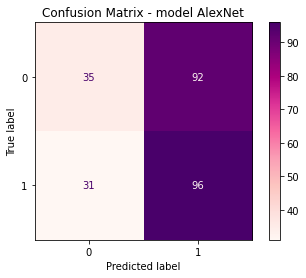

In [8]:
predict_model = model.predict(data_test, steps=(len(data_test)))
y_true = data_test.classes
y_pred = predict_model.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))

disp.plot(cmap=plt.cm.RdPu) #Color
plt.title("Confusion Matrix - model "+ name_model)
plt.show()
